In [1]:
from dla_cnn.desi.preprocess import estimate_s2n
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from matplotlib.pyplot import MultipleLocator
from dla_cnn.desi.DesiMock import DesiMock

In [2]:
#all fits files in 7 folder
files = [700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 791, 792, 793, 794, 795, 796, 797, 798, 799]

# estimate snr for zqso>2.33 sightline with DLA (number 17805)

In [3]:
snr=[]
idlist=[]
for ii in files:
    spectra='/Users/zjq/7/%s/spectra-16-%s.fits'%(ii,ii)
    truth='/Users/zjq/7/%s/truth-16-%s.fits'%(ii,ii)
    zbest='/Users/zjq/7/%s/zbest-16-%s.fits'%(ii,ii)
    specs = DesiMock()
    specs.read_fits_file(spectra,truth,zbest)
    keys = list(specs.data.keys())
    for jj in keys:
        sightline = specs.get_sightline(jj)
        if sightline.z_qso>=2.33:
            if sightline.dlas:
                snr.append(estimate_s2n(sightline))
                idlist.append(jj)




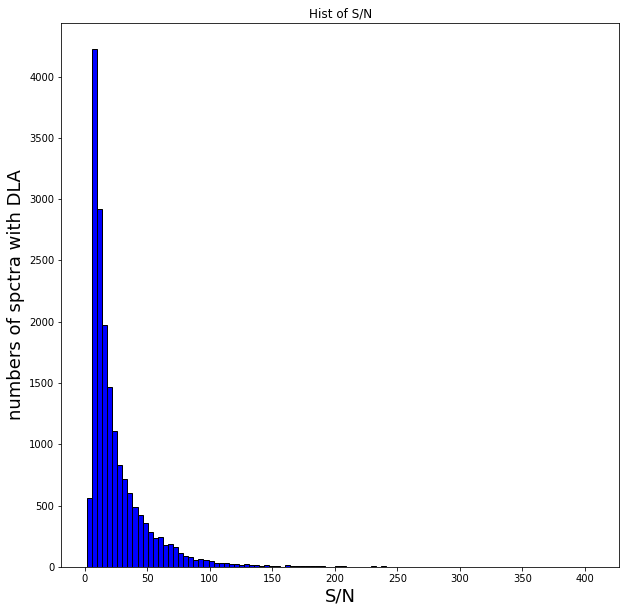

In [4]:
plt.figure(figsize=(10,10))
n,bins,patches=plt.hist(snr,bins=100,density=False,color='blue',edgecolor='black')
plt.xlabel('S/N',fontsize=18)
plt.ylabel('numbers of spctra with DLA',fontsize=18)
plt.title('Hist of S/N')
plt.savefig('/Users/zjq/Desktop/Hist of SNR.png')

# uniform snr

In [5]:
from dla_cnn.desi.uniform_snr import snr_uniform


In [6]:
#uniform s/n 4000 sample with dla
snr=np.array(snr)
idarray=np.array(idlist)
samplesnr_id=snr_uniform(snr,idarray,20,200,[3,50])

In [8]:
index_sample=[]
for i in range(0,len(samplesnr_id)):    
    index_sample.append(np.where(idarray==samplesnr_id[i]))
snr_sample=snr[index_sample].ravel()

Text(0.5, 1.0, 'Hist of sample S/N')

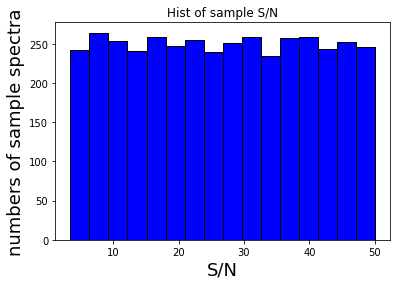

In [9]:
n,bins,patches=plt.hist(snr_sample,bins='auto',density=False,color='blue',edgecolor='black')
plt.xlabel('S/N',fontsize=18)
plt.ylabel('numbers of sample spectra',fontsize=18)
plt.title('Hist of sample S/N')

In [10]:
train_save_file='/Users/zjq/samplesnr_id.npy'
np.save(train_save_file, samplesnr_id)

In [12]:
samplesnr_id=np.load(train_save_file,allow_pickle=True)